# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:
#importing all required libs
import numpy as np #library used for working with arrays
import pandas as pd #library used for data manipulation and analysis 
import matplotlib.pyplot as plt #library for plots and visualisations
import seaborn as sns #library for visualisations
sns.set_theme(style="darkgrid")
%matplotlib inline 

import scipy.stats as stats #this library contains a large number of probability distributions and statistical functions

## Reading the Data into a DataFrame

In [ ]:
# Connecting Google Colab and mounting 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the data from CSV files which is stored in google drive folder
df = pd.read_csv('/content/drive/MyDrive/PythonCourse/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

### Understanding structure of the given dataset

Viewing the first 5 rows and last 5 rows of the given dataset

In [ ]:
# Checking at head (5 observations) 
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
# Checking at tail (5 observations) 
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


* **Checking the shape of the dataset**

In [ ]:
# Using shape to get number of columns and rows in the dataframe
df.shape

(100, 6)

**Observation**

Given data frame has 100 rows or ovservations and 6 columns or features

* **Checking info of the given dataset**

In [ ]:
# Using function - info() to print a summary of the DataFrame
# which shows the name, datatype of columns and non-null count
# also, shows memory usage of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


**Observations**

There are a total of 100 entries/observations and 6 columns/features in the dataset.

There are 3 different data types:

1. int64(1) : user_id
2. float64(1) : time_spent_on_the_page
3. object(4) : group, landing_page, converted, language_preferred

Memory usage is 4.8+ KB.

* **Displaying statistical summary of the dataset**

In [ ]:
# describe() : Computes and displays a summary of statistics pertaining to the DataFrame columns
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


**Observations**:

A total of 100 entries are included in the dataset
1. The average "time spent on the page" is about *5.38 minutes*

2. The standard deviation is about *2.38 minutes*

Inter-quartile range includes:

> Min = 0.19

> 25% quartile = 3.88

> 50% quartile = 5.42

> 75% quartile = 7.02

> Max = 10.71





* **Checking distrinct values in categorical columns**

In [ ]:
#group column - checking counts and distrinct values
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

**Observation:**
There are 2 types of groups control & treatment. Each with 50 counts .

In [ ]:
#language_preferred column - checking counts and distrinct values
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

**Observation:** There are 3 types of values in language preferred -

       * spanish with 34 counts
       * french with 34 counts
       * english with 32 counts

data type is int64      

In [ ]:
#counting distrinct values of column converted
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

**Observation:**  The attribute converted has 2 values in the given dataset - yes (54 counts) and no (46 counts)

In [ ]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

**Obeservation:** The column landing page has 2 values old and new. Each 50 counts

* **Checking for null values in the dataset**

In [ ]:
# isnull() : Detects the null values in the data set

# isnull().sum() : Counts the numbers of missing values in data set for each column
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

**Observation** : There is no missing values in given dataset

* **Checking for duplicate data in dataset**

In [ ]:
df.duplicated().sum()

0

**Observation**: There is no duplicate values in the given dataset

### Univariate Analysis

**Analyzing column - Group**

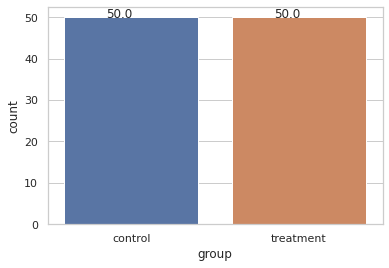

In [ ]:
ax = sns.countplot(data = df, x='group' )
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

**Observation**:

The column *group* has 2 unique values control and treatment groups. There are 50 counts in the control group and 50 counts in the treatment group.

**Analyzing column - Landing Page**

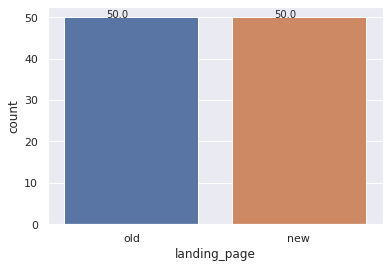

In [ ]:
ax = sns.countplot(data = df, x ='landing_page')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

**Observation**:

The column *landing page* has 2 unique values old and new landing page. The data shows 50 observations for both old and new landing page.

**Analyzing column - Time Spent on the Page**

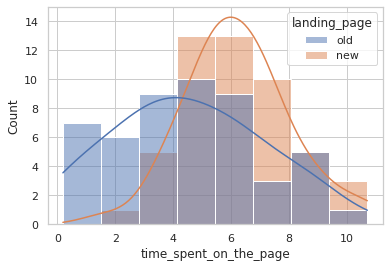

In [ ]:
sns.set(style = 'whitegrid')
sns.histplot(data = df, x = 'time_spent_on_the_page', kde ='True' , hue = 'landing_page')
plt.show()


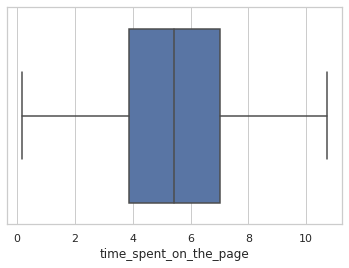

In [ ]:
sns.boxplot( data = df, x = 'time_spent_on_the_page')
plt.show()

**Observations**:

The data seems to have almost normal distribution. 

1. The average "time spent on the page" is about *5.38 minutes*  

2. The standard deviation is about *2.38 minutes*

Inter-quartile range includes:

> Min = 0.19

> 25% quartile = 3.88

> 50% quartile = 5.42

> 75% quartile = 7.02

> Max = 10.71

**Analyzing column - Converted**

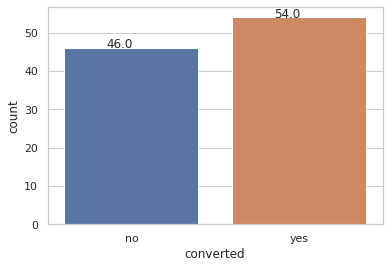

In [ ]:
sns.set(style='whitegrid')
ax = sns.countplot(data=df, x='converted'  )
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

**Observation:** There are 2 types of values in converted - yes and no.
Converted as yes is more than not converted.

**Analyzing column - Language Preffered**

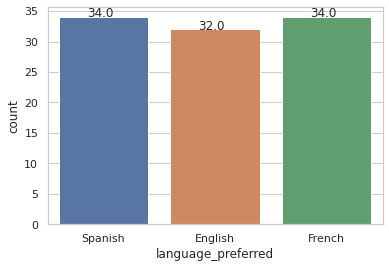

In [ ]:
ax = sns.countplot(data=df,x='language_preferred')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

**Observation:** 
There are 3 types of values in language preferred -

Spanish & French are hightest with 34 counts. English has 32 counts.

### Bivariate Analysis

In [ ]:
df.corr()

,user_id,time_spent_on_the_page
user_id,1.000000,-0.372868
time_spent_on_the_page,-0.372868,1.000000


#### Landing page vs Time spent ont the page

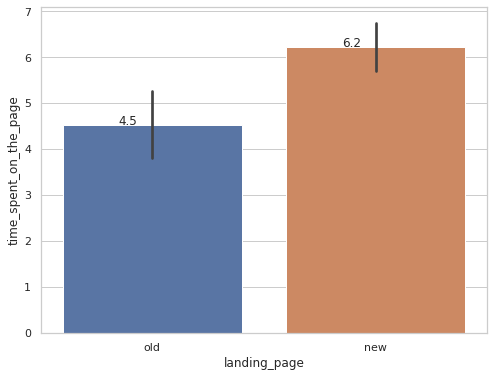

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=df,x='landing_page',y='time_spent_on_the_page')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()


In [ ]:
df_new_time = df[ df["landing_page"] == "new" ]["time_spent_on_the_page"]
df_old_time = df[ df["landing_page"] == "old" ]["time_spent_on_the_page"]

print("New Landing Page : Total time spend :"+str( round(df_new_time.sum() ,2)) 
          + " mins & avg time spent :" +str( round(df_new_time.mean() ,2))+" mins")

print("Old Landing Page : Total time spend :"+str( round(df_old_time.sum() ,2)) 
          + " mins & avg time spent :" +str( round(df_old_time.mean() ,2))+" mins")

New Landing Page : Total time spend :311.16 mins & avg time spent :6.22 mins
Old Landing Page : Total time spend :226.62 mins & avg time spent :4.53 mins


**Observations**:
Users using the new landing page spend more time on average and on total than those on the old landing page.

#### Conversion status vs Time spent on the page

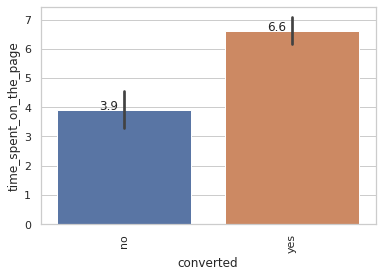

In [ ]:
ax = sns.barplot(x = 'converted', y = 'time_spent_on_the_page', data = df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation=90);


**Observations:**
Users who converted to a subscriber of the news portal on average spent higher on the page than who are not converted.

#### Conversion status vs Landing page

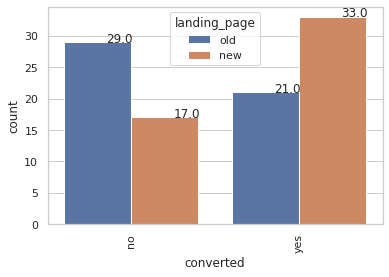

In [ ]:
ax = sns.countplot(x = 'converted', data = df, hue = 'landing_page')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation=90);

**Observations**:
Number of conversion is higher for new landing page when compared to old landing page 

#### Language preferred vs Time spent on the page

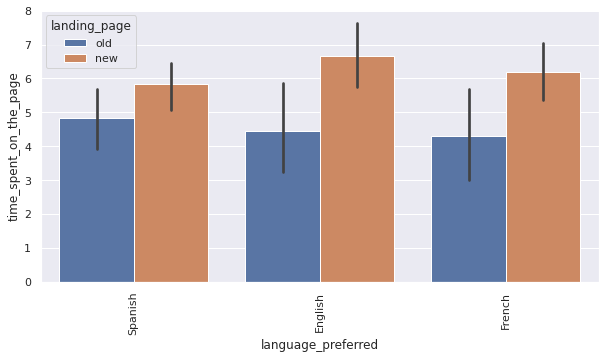

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page', hue = 'landing_page');

plt.xticks(rotation=90);

**Observations**:

Users with preferred language as English, French, and Spanish , spent almost same average time on the page.

#### Language preferred vs Time spent on the page

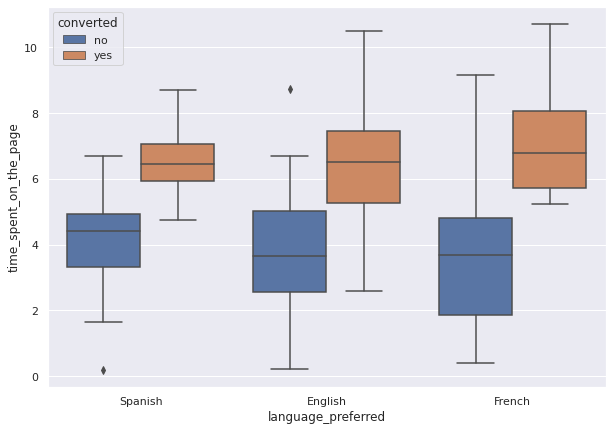

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(data = df, x='language_preferred' , y = 'time_spent_on_the_page', hue = 'converted')
plt.show()

**Observations**:

In all 3 languages, users who are converted to subscribers have spent more time on the page.

#### Landing page vs Time spent on the page

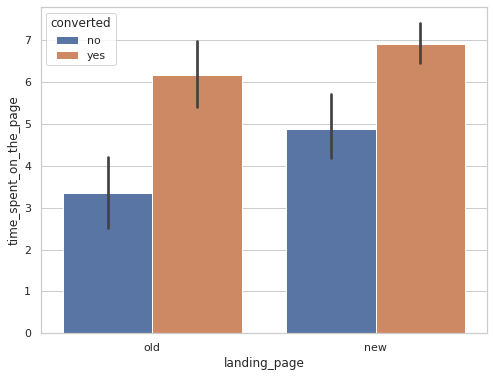

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page', hue = 'converted');

**Observation**:

Users who has new landing page are more likely to get converted to subscriber and spent more time on the page.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

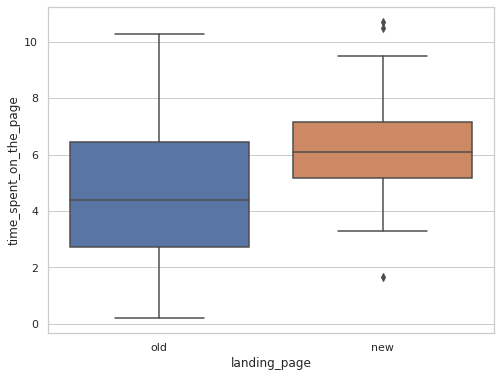

In [ ]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

In [ ]:
df.groupby(['landing_page'])['time_spent_on_the_page'].mean()

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

**Observation** 

It is observed from the above boxplot that one an average , user is spending more time on new page than old page

### Step 1: Define the null and alternate hypotheses

We are assuming that,
 µ1 is average time spent on new page
 µ2 is average time spent on old page

 H0 : µ1 = µ2 , Average time spent on new page and old page are same

 Ha : µ1 < µ2 , Average time spent on new page is less than old page


### Step 2: Select Appropriate test

* This is a one-tailed test concerning two population means from two 
independent populations. 
* The population standard deviations are unknown.

Based on this, we can use **paired t-test** for this problem

### Step 3: Decide the significance level

As given in the problem statement, ⍺  = 0.05.

### Step 4: Collect and prepare data

In [ ]:
# data frame for new landing page users 
mu1 = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# data frame for old landing page users 
mu2 = df[df['landing_page'] == 'old']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [ ]:
#upgrading scipy to latest version as it was showing error for argument 'alternative' 
!pip install scipy --upgrade 


In [ ]:
import scipy
scipy.__version__

'1.7.3'

In [ ]:

# Importing stats package 
from scipy.stats import stats

# Calculating the p-value
test_stat, p_value  = stats.ttest_rel(mu1, mu2, alternative = 'greater')  #Performing a paired t-test

print('The p-value is', p_value)

The p-value is 0.00029910900937037973


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.00029910900937037973 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

The p value is 0.0003 which is less than the 0.05. Hence, we reject the null hypothesis.

At 5% significance level, we reject the null hypothesis. We have enough statistical evidence to say that **users spends more time on the new landing page than on the old landing page**.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

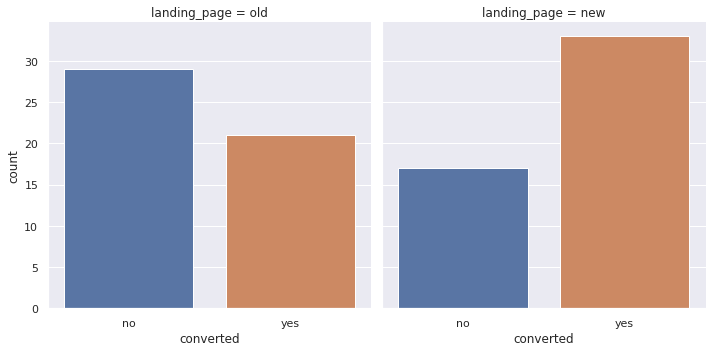

In [ ]:
sns.catplot(data = df, x = 'converted', col = 'landing_page', kind = 'count');

**Observation** 

The users who are using new landing page are more likely to convert than the users who are using old landing page.


**Null Hypothesis and Alternate Hypothesis**

Let's assume p1 and p2 are proportion of coverters in new and old panding page


We will test Null hypothesis is

H0 : p1= p2

Against alternative hypothesis

Ha : p1     ≠p2


In [ ]:
#find the number of users who converted among both groups, old landing page and new landing page
df.groupby(['landing_page'])['converted'].value_counts()

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: converted, dtype: int64

In [ ]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest
#To suppress future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# set the counts of converters
converter_count = np.array([21, 33])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(converter_count, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.016052616408112556


Compare p-value with ⍺

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.016052616408112556 is less than the level of significance, we reject the null hypothesis.


**Draw Inference**

At 5% significance level, we reject the null hypothesis. Hence we have enough statistical evidence to say that the conversion rate among the two groups, old landing page and new landing page are different.

What conclusion does the test lead to?

In this scenario, the p value is 0.016 which is less than the 0.05. Hence, we reject the null hypothesis.
This means that the conversion rate among the two groups, **old landing page and new landing page are significantly different**.


## 3. Is the conversion and preferred language are independent or related?

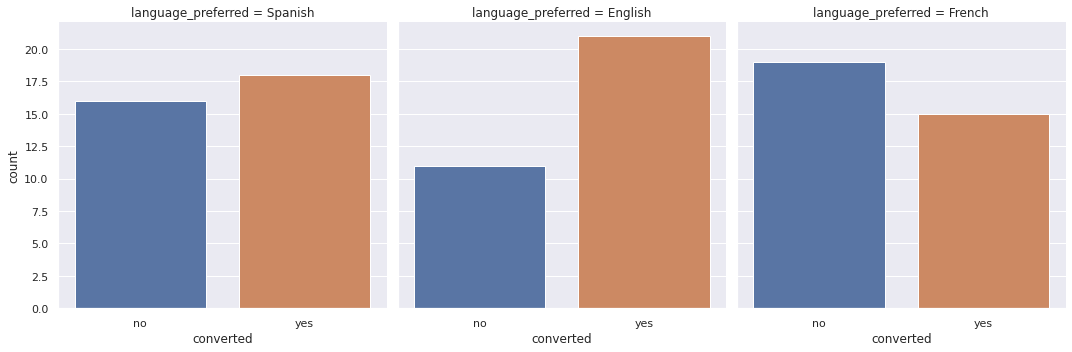

In [ ]:
sns.catplot(data = df, x = 'converted', col = 'language_preferred',  kind = 'count');



**Observation**

From the above diagram, we can observe that mostly the English language users have converted from old landing page to new landing page. But there is no major effect on French or Spanish language users.

In [ ]:
df.groupby(['language_preferred'])['converted'].value_counts()

language_preferred  converted
English             yes          21
                    no           11
French              no           19
                    yes          15
Spanish             yes          18
                    no           16
Name: converted, dtype: int64

In [ ]:
df_lang_cov = pd.crosstab(df['converted'], df['language_preferred'])
df_lang_cov

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


**Null and alternative hypothesis**

We will test the Null hypothesis

H0 : Converted status is independent of language preffered

Against alternate hypothesis 

H1 : Converted status is dependent on language preferred




This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. 

In [ ]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(df_lang_cov)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


**Compare p-value with ⍺**


In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


**Insight**

At 5% significance level, we fail to reject the null hypothesis. Hence we don't have enough statistical evidence to say that converted status depends on language preferrence.

**Conclusion**

In this scenario, the p value is 0.213 which is greater than the 0.05. Hence, we fail to reject the null hypothesis.

This means that the **converted status is independent of language preferred**.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis


In [ ]:
# create a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

df_new.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


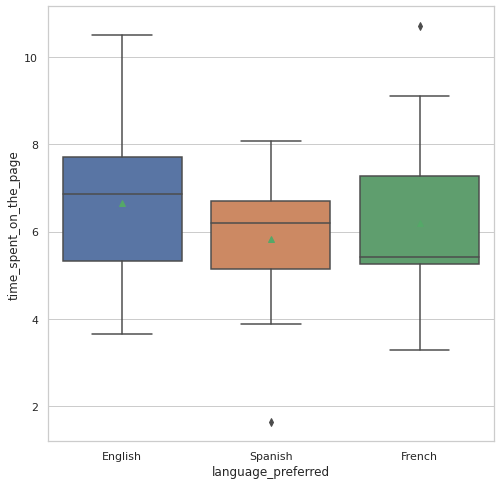

In [ ]:
# complete the code to visually plot the time spent on the new page for different language users
plt.figure(figsize=(8,8))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()

In [ ]:
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

**Observation**

The average time spent on the pages seems to be almost same among different language preferences.

### Step 1: Define the null and alternate hypotheses

Let µ1, µ2, µ3 be the means of time spent on the new landing page for language preferences English, Spanish and French respectively.

We will test the null hypothesis

    H0 : µ1 = µ2 = µ3   where average time spent on new landing page for all languages are equal

    Ha : µ1 ≠ µ2 ≠ µ3  At least one time average of the new landing page is different among the language preferences.







### Step 2: Select Appropriate test



This is a problem, concerning three population means, oneway ANOVA test will be appropiate.


### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05

### Step 4: Collect and prepare data

In [ ]:
# create a subsetted data frame of the time spent on the new page by English language users 
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']   
time_spent_Spanish = df_new[df_new['language_preferred']== 'Spanish']['time_spent_on_the_page']

In [ ]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(time_spent_English, 
                              time_spent_French,
                              time_spent_Spanish)
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

The p value is 0.432 which is greater than the 0.05, we fail to reject the null hypothesis. Hence, **we do not have enough statistical significance to conclude that at least one mean time spent on the new landing page for diferrent preferred languages is different from the rest** at 5% significance level.

## Summary 

###Conclusion 
Given below are the conclusions that we derived after doing statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal .


1. There is enough evidence to support the claim that mean time spent on the new landing page is higher than mean time spent on the old landing page. 

   Total (across all users) and average time spent on the new landing page (311.16 & 6.22 mins) is higher than on the old landing page (226.62 & 4.53 mins).

2. We found enough evidence to conclude that number of conversion is higher for new landing page than old landing page.

3. There is not enough evidence to support the claim that conversion rate is dependent on the preferred language.

4. We did not find enough statistical significance to conclude that at least one mean time spent on the new landing page for different preferred languages is different from the rest .

###Business Recommendations


Statistically, we found that **users are spending more time on new page than the old landing page**. Also, **conversion rate of users to a subcriber is more in the second group (treatment group) who has new page as their landing page**.
So, we can conclude that the new landing page is effective from business standpoint to obtain more new subscribers.